In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Core #
import json
import os
import re

# IO
import h5py

# Science And Plotting #
import matplotlib
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import optimize

# Analysis #
import arpes
import arpes.config
from arpes.models.spectrum import DLD_Spectrum_factory, load_DLD
from arpes.models.view import View

# Jupyter #
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# Configure Jupyter #
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [33]:
from arpes.models.view import View

metadata = None
with open(os.path.join(arpes.config.SOURCE_PATH, 'datasets/ToF_debug/DLD_9_18.json')) as metadata_file:
    metadata = json.load(metadata_file)

spectra = {}
for spectrum_metadata in metadata:
    spectra[spectrum_metadata['unique_name']] = load_DLD(metadata=spectrum_metadata)


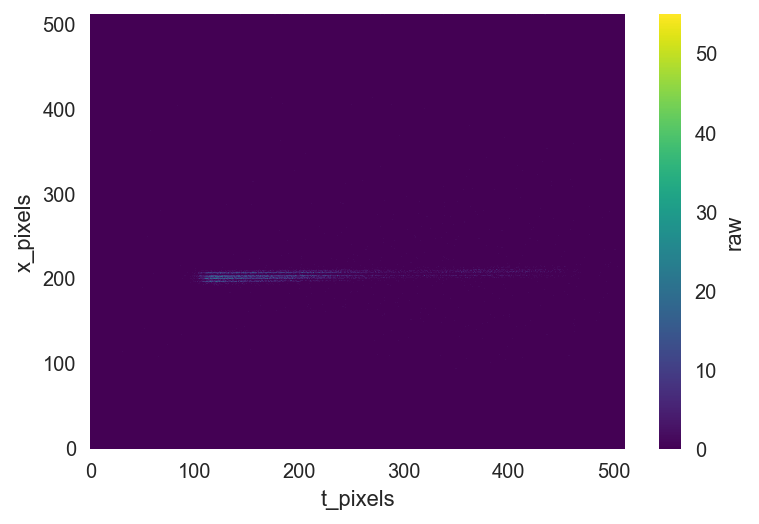

In [9]:
spectra['t_at_55'].raw.plot()

In [41]:
from arpes.preparation import process_DLD
for k, v in spectra.items():
    spectra[k] = process_DLD(v)

In [27]:
s

<xarray.Dataset>
Dimensions:      (KE: 1800, t_pixels: 512, x_pixels: 512)
Coordinates:
  * x_pixels     (x_pixels) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 ...
  * t_pixels     (t_pixels) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 ...
  * KE           (KE) float64 1.0 1.005 1.01 1.015 1.02 1.025 1.03 1.035 ...
Data variables:
    raw          (x_pixels, t_pixels) >i2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    KE_spectrum  (x_pixels, KE) int16 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...

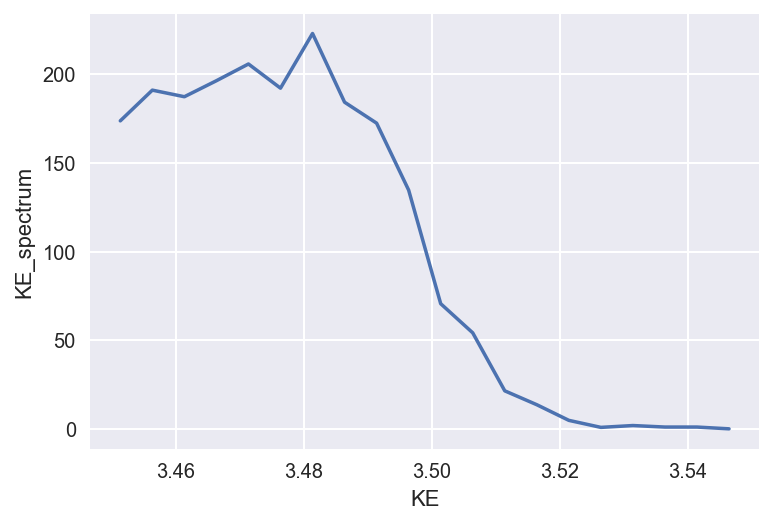

In [49]:
sum_spectra = None

for k, v in spectra.items():
    if sum_spectra is None:
        sum_spectra = v.KE_spectrum.sum('x_pixels')
    else:
        sum_spectra = sum_spectra + v.KE_spectrum.sum('x_pixels')

sum_spectra.sel(KE=slice(3.45, 3.55)).plot()